In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

# import all csv's
file1 = "all_state_violent_crimes.csv"
file2 = "Opioid Stats.csv"
file3 = "nibrs_incident.csv"

# read csv's and assign
crime_data = pd.read_csv(file1)
opioid_data = pd.read_csv(file2)
incident_data = pd.read_csv(file3)



In [35]:
# Clean csv = crime_data and reduce to select states

# Cleaning the headers of the DataFrame to more user friendly information
crime_data = crime_data.rename(columns={"year":"Year","state_id":"State ID","state_abbr":"State Abbreviation","state_name":"State Name","population":"Population","violent_crime":"Violent Crime","homicide":"Homicide","rape_legacy":"Rape Legacy","rape_revised":"Rape Revised","robbery":"Robbery","aggravated_assault":"Aggravated Assault","property_crime":"Property Crime","burglary":"Burglary","larceny":"Larceny","motor_vehicle_theft":"Motor Vehicle Theft"})

# Cleaning crime_data dataframe - eliminating columns not needed.
crime_data = pd.DataFrame(crime_data, columns = ["Year","State Name","Population","Violent Crime","Homicide", "Rape Legacy","Rape Revised","Robbery", "Aggravated Assault","Property Crime", "Burglary", "Larceny", "Motor Vehicle Theft"])

# (long way) Pulling only select states needed for our study
crime_data_wash = crime_data[crime_data['State Name'] == "Washington"]
crime_data_ari = crime_data[crime_data['State Name'] == "Arizona"]
crime_data_flor = crime_data[crime_data['State Name'] == "Florida"]
crime_data_col = crime_data[crime_data['State Name'] == 'Colorado']

# compiling the DFs created above
frames = [crime_data_ari, crime_data_col, crime_data_flor, crime_data_wash]

# Concatenate frames into one DataFrame for use.
state_violent_crime = pd.concat(frames)

# view data.
state_violent_crime.head()

,Year,State Name,Population,Violent Crime,Homicide,Rape Legacy,Rape Revised,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor Vehicle Theft
92,1995,Arizona,4218000,30095,439,1418,NaN,7329,20909,316355,59762,207763,48830
93,1996,Arizona,4428000,27963,377,1381,NaN,7429,18776,284964,55630,188300,41034
94,1997,Arizona,4555000,28411,375,1492,NaN,7547,18997,299323,60077,195045,44201
95,1998,Arizona,4669000,26984,376,1451,NaN,7715,17442,280001,56473,183137,40391
96,1999,Arizona,4778332,26334,384,1383,NaN,7288,17279,255401,49423,167731,38247


In [37]:
state_violent_crime['Rape Revised'].fillna(0, inplace=True)
state_violent_crime['Rape'] = state_violent_crime['Rape Legacy'] + state_violent_crime['Rape Revised']
state_crime = state_violent_crime.drop(columns="Rape Legacy")
state_crime = state_violent_crime.drop(columns="Rape Revised")

In [67]:
# drop NaN values precaution
state_crime.dropna(how='any')
# view clean data
state_crime.head()


,Year,State Name,Population,Violent Crime,Homicide,Rape Legacy,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor Vehicle Theft,Rape
92,1995,Arizona,4218000,30095,439,1418,7329,20909,316355,59762,207763,48830,1418.0
93,1996,Arizona,4428000,27963,377,1381,7429,18776,284964,55630,188300,41034,1381.0
94,1997,Arizona,4555000,28411,375,1492,7547,18997,299323,60077,195045,44201,1492.0
95,1998,Arizona,4669000,26984,376,1451,7715,17442,280001,56473,183137,40391,1451.0
96,1999,Arizona,4778332,26334,384,1383,7288,17279,255401,49423,167731,38247,1383.0
97,2000,Arizona,5130632,27281,359,1577,7504,17841,271811,51902,176705,43204,1577.0
98,2001,Arizona,5306966,28675,400,1518,8868,17889,293874,54821,186850,52203,1518.0
99,2002,Arizona,5441125,30171,387,1608,8000,20176,318296,59087,201541,57668,1608.0
100,2003,Arizona,5579222,28638,441,1856,7619,18722,314335,58613,198725,56997,1856.0
101,2004,Arizona,5739879,28952,414,1896,7721,18921,291203,56885,179012,55306,1896.0


In [107]:
# Dates for legalization in marijuana
# recreational rounded year
colorado_rec = "2013"
washington_rec = "2013"

# medicinal marijuana legalization date - month/year
arizona_med = "2010"
colorado_med = "2001"
florida_med = "2017"
washington_med = "1999"

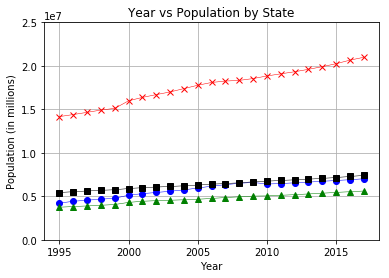

In [106]:
# POPULATION VS YEAR BY STATE
arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Population']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Population']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Population']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Population']

plt.ylim(0,25000000)

plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')

plt.title("Year vs Population by State")
plt.xlabel("Year")
plt.ylabel("Population (in millions)")

plt.plot()

plt.grid()

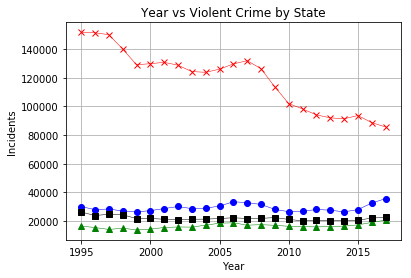

In [109]:
# VIOLENT CRIME VS YEAR BY STATE
arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Violent Crime']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Violent Crime']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Violent Crime']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Violent Crime']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')

plt.title("Year vs Violent Crime by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

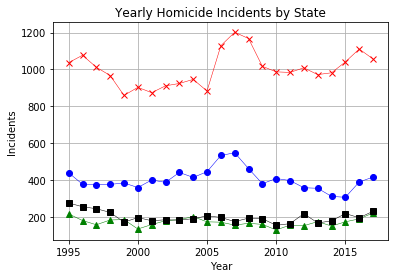

In [110]:
# HOMICIDE VS YEAR BY STATE
arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Homicide']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Homicide']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Homicide']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Homicide']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')

plt.title("Yearly Homicide Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

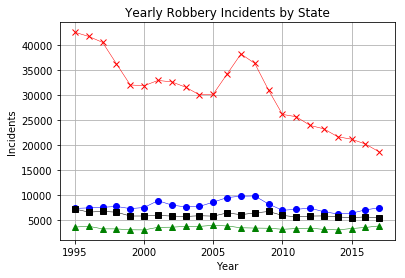

In [111]:
# ROBERY VS YEAR BY STATE
arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Robbery']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Robbery']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Robbery']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Robbery']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')

plt.title("Yearly Robbery Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

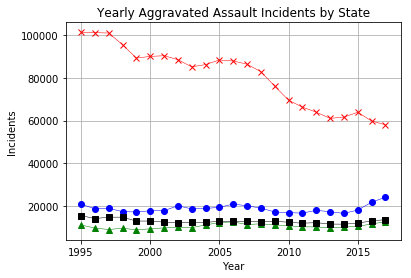

In [112]:
# AGGRAVATED ASSAULT VS YEAR BY STATE
arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Aggravated Assault']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Aggravated Assault']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Aggravated Assault']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Aggravated Assault']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')

plt.title("Yearly Aggravated Assault Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

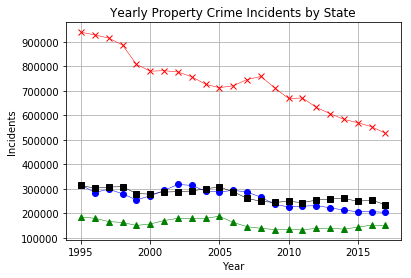

In [113]:
# PROPERTY CRIME VS YEAR BY STATE
arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Property Crime']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Property Crime']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Property Crime']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Property Crime']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')

plt.title("Yearly Property Crime Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

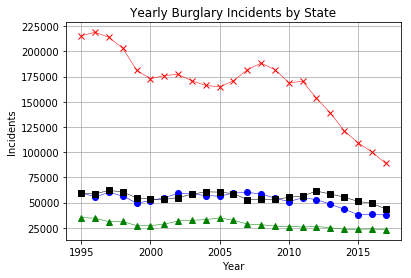

In [114]:
# BURGLARY VS YEAR BY STATE
arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Burglary']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Burglary']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Burglary']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Burglary']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')

plt.title("Yearly Burglary Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

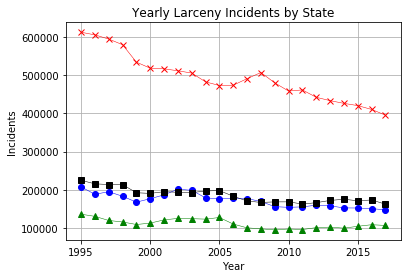

In [115]:
# LARCENY VS YEAR BY STATE
arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Larceny']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Larceny']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Larceny']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Larceny']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')

plt.title("Yearly Larceny Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

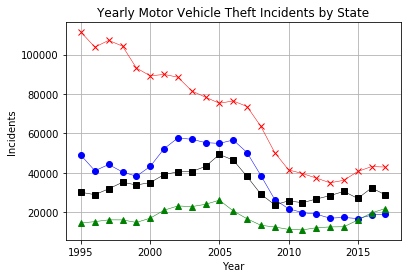

In [116]:
# MOTOR VEHICLE THEFT VS YEAR BY STATE
arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Motor Vehicle Theft']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Motor Vehicle Theft']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Motor Vehicle Theft']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Motor Vehicle Theft']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')

plt.title("Yearly Motor Vehicle Theft Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

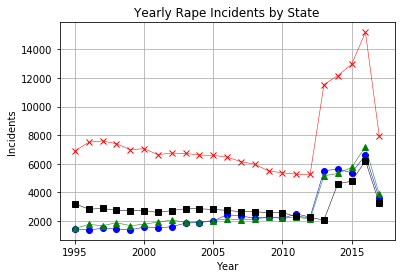

In [117]:
# RAPE VS YEAR BY STATE
arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Rape']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Rape']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Rape']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Rape']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')

plt.title("Yearly Rape Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()